# Домашнее задание №1: Классификация. 
# Логистическая регрессия и kNN.

*While the machines are being fixed.*

Формат сдачи будет объявлен позднее. Либо это будет проверяющая система, либо telegram-бот. 

<span style="color: red; font-size: 14pt">Дедлайны: 
* ФИВТ, третий курс - 4 марта 23:59
* Открытый курс - 7 марта, 23:59
</span>

### Часть 1. Небольшой numpy-разогрев. (10%)

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Создайте случайную матрицу A размерами 10 на 10 из целых чисел от 0 до 100
# hint: np.random.randint

# Ваш код здесь
A = np.random.randint(0, 100, (10, 10))
A

array([[39, 20, 53, 64, 67, 68, 50, 38, 66, 22],
       [71, 83, 54, 28, 47, 88, 34,  3, 72, 25],
       [49, 13, 55, 50, 90, 15,  8, 46, 26, 18],
       [52, 38, 76, 97, 52, 40, 62, 65, 65, 77],
       [47, 47, 23, 80, 60, 77, 17, 21, 58, 23],
       [78, 90, 15,  1, 32,  9, 77, 17, 19, 23],
       [78, 90, 12, 31, 69, 46,  6, 46, 84, 91],
       [86, 98, 72, 46, 83, 42, 33, 55, 64, 74],
       [90, 82, 85, 31, 80, 64, 92, 47, 17, 47],
       [62, 23, 63, 49, 92, 32, 26, 28, 14, 79]])

In [3]:
# Посчитайте средние значения в матрице по столбцам

# Ваш код здесь
np.mean(A, axis = 0)

array([65.2, 58.4, 50.8, 47.7, 67.2, 48.1, 40.5, 36.6, 48.5, 47.9])

In [4]:
# Транспонируйте матрицу A

# Ваш код здесь
A_T = A.T
A_T

array([[39, 71, 49, 52, 47, 78, 78, 86, 90, 62],
       [20, 83, 13, 38, 47, 90, 90, 98, 82, 23],
       [53, 54, 55, 76, 23, 15, 12, 72, 85, 63],
       [64, 28, 50, 97, 80,  1, 31, 46, 31, 49],
       [67, 47, 90, 52, 60, 32, 69, 83, 80, 92],
       [68, 88, 15, 40, 77,  9, 46, 42, 64, 32],
       [50, 34,  8, 62, 17, 77,  6, 33, 92, 26],
       [38,  3, 46, 65, 21, 17, 46, 55, 47, 28],
       [66, 72, 26, 65, 58, 19, 84, 64, 17, 14],
       [22, 25, 18, 77, 23, 23, 91, 74, 47, 79]])

In [5]:
# Перемножьте поэлементно матрицу A и транспонированную матрицу A 

# Ваш код здесь
B = (A * A_T)
B

array([[1521, 1420, 2597, 3328, 3149, 5304, 3900, 3268, 5940, 1364],
       [1420, 6889,  702, 1064, 2209, 7920, 3060,  294, 5904,  575],
       [2597,  702, 3025, 3800, 2070,  225,   96, 3312, 2210, 1134],
       [3328, 1064, 3800, 9409, 4160,   40, 1922, 2990, 2015, 3773],
       [3149, 2209, 2070, 4160, 3600, 2464, 1173, 1743, 4640, 2116],
       [5304, 7920,  225,   40, 2464,   81, 3542,  714, 1216,  736],
       [3900, 3060,   96, 1922, 1173, 3542,   36, 1518, 7728, 2366],
       [3268,  294, 3312, 2990, 1743,  714, 1518, 3025, 3008, 2072],
       [5940, 5904, 2210, 2015, 4640, 1216, 7728, 3008,  289,  658],
       [1364,  575, 1134, 3773, 2116,  736, 2366, 2072,  658, 6241]])

In [6]:
# Посчитайте dot product (результат матричного умножения) матрицы A на саму себя и запишите в матрицу B
# https://en.wikipedia.org/wiki/Dot_product

# Ваш код здесь
C = np.dot(A, A_T)
C

array([[26723, 25332, 19596, 30782, 24350, 14713, 24807, 30083, 29893,
        22719],
       [25332, 32557, 17210, 28538, 25708, 20754, 30480, 34758, 33714,
        22176],
       [19596, 17210, 19600, 23914, 17758, 11188, 20088, 25638, 24047,
        21294],
       [30782, 28538, 23914, 41860, 27898, 19622, 32652, 39605, 37466,
        30128],
       [24350, 25708, 17758, 27898, 25499, 14231, 26367, 29328, 26865,
        21007],
       [14713, 20754, 11188, 19622, 14231, 22623, 21950, 26082, 28129,
        15693],
       [24807, 30480, 20088, 32652, 26367, 21950, 39655, 40315, 33264,
        26810],
       [30083, 34758, 25638, 39605, 29328, 26082, 40315, 46639, 42837,
        32496],
       [29893, 33714, 24047, 37466, 26865, 28129, 33264, 42837, 46677,
        31407],
       [22719, 22176, 21294, 30128, 21007, 15693, 26810, 32496, 31407,
        28128]])

### Часть 2. Логистическая регрессия и kNN.

Будем работать с подвыборкой из [данных о типе лесного покрытия из репозитория UCI](http://archive.ics.uci.edu/ml/datasets/Covertype). Доступно 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными. Описание данных доступно по ссылке, а так же в файле `covtype.info.txt`.

In [7]:
all_data = pd.read_csv('forest_dataset.csv')

Выделите 20% данных в `delayed_data` в качестве выборки, на которой будет производиться финальное сравнение моделей, в `all_data` поместите оставшиеся 80%.

In [8]:
# Ваш код здесь
delayed_data = all_data.sample(frac = 0.2)
all_data = all_data.drop(index = delayed_data.index)

print (delayed_data.shape)
print (all_data.shape)

(2000, 55)
(8000, 55)


Выделим значения метки класса в переменную `labels`, признаковые описания в переменную `feature_matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`-формат с помощью метода `.values`.

In [9]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

#### 2.1 Двуклассовая классификация (10%)

Для начала будем работать только с двумя типами лесного покрытия. Обучите линейный классификатор для разделения двух классов. Данные разделите на train и test с помощью `train_test_split`.

In [10]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [11]:
two_class_labels_indices = (labels == 1) + (labels == 2)

two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]

In [12]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(two_class_feature_matrix,
                                                                                       two_class_labels)

Обучите логистическую регрессию. Оцените качество классификации на отложенной выборке с помощью `accuracy` и `f1_score` ([Wikipedia](https://en.wikipedia.org/wiki/F1_score)).

In [13]:
lr_clf = LogisticRegression()

In [14]:
# Ваш код здесь
lr_clf.fit(train_feature_matrix, train_labels)


y_pred = lr_clf.predict(test_feature_matrix)

acc_score = accuracy_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)

print('accuracy is ', acc_score)
print('f1_score is ', f1)

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy is  0.7638483965014577
f1_score is  0.7257955314827352


#### 2.2 Многоклассовая классификация: логистическая регрессия (40%)

**Комментарий:**

*Логистическая регрессия позволяет решать и задачу многоклассовой классификации. Класс ``LogisticRegression`` позвляет это делать двумя способами:* 
- *1. Стандартный One vs Rest (т.е. каждый класс отделяется от всех других). Параметр `multi_class='ovr'`.*
- *2. Используюя кросс-энтропию (оценивается сразу вектор вероятностей принадлежности классам). Параметр `multi_class='multinomial'`.*

*По умолчанию будем использовать второй способ.*


Теперь будем работать со всеми 7 типами покрытия (данные уже находятся в переменных `feature_matrix` и `labels`, если Вы их не переопределили). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Обучите логистическую регрессию  на данном датасете.

In [15]:
lr_clf = LogisticRegression()

# Ваш код здесь
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(feature_matrix,
                                                                                        labels,
                                                                                        test_size=0.2,
                                                                                        random_state=42)

lr_clf.fit(train_feature_matrix, train_labels)

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `С` и `penalty`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `penalty` - `['l1', 'l2']`. Критерий качества `scoring = 'accuracy'`.

In [16]:
# Ваш код здесь
from sklearn.model_selection import GridSearchCV

parameters = {'penalty' : ('l1', 'l2'), 'C' : np.linspace(0.01, 1, 10)}
grid_cv = GridSearchCV(lr_clf, parameters, scoring = 'accuracy', cv = 5)

grid_cv.fit(train_feature_matrix, train_labels)

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.2

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver 

/opt/anaconda/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spe

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver 

/opt/anaconda/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.2

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.2

/opt/anaconda/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.2

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ('l1', 'l2'), 'C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

Постройте графики средних значений критерия качества `accuracy` для типов регуляризации `l1` и `l2` в зависимости от коэффициента регуляризации `C`.

/opt/anaconda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/anaconda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/anaconda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/anaconda/lib/python3.7/site-packages/sklearn/utils/de

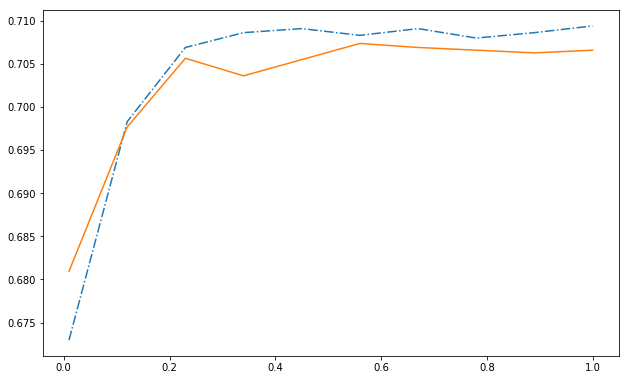

In [17]:
results = pd.DataFrame(grid_cv.cv_results_)
results.head(10)

# Ваш код здесь

l1_res = results[results['param_penalty'] == 'l1']
l2_res = results[results['param_penalty'] == 'l2']

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(l1_res['param_C'], l1_res['mean_test_score'], '-.')
axes.plot(l2_res['param_C'], l2_res['mean_test_score'])

plt.show()

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров `C` и `penalty`?

In [18]:
# Ваш код здесь
print('best params: ', grid_cv.best_params_)
print('best score: ', grid_cv.best_score_)

best params:  {'C': 1.0, 'penalty': 'l1'}
best score:  0.709375


Используя найденные оптимальные значения `C` и `penalty`, обучите логистическую регрессию на обучающей выборке (train) и вычислите вероятности принадлежности к классам для тестовой (test)  выборки (`best_lr_clf.predict_proba`).

In [22]:
best_lr_clf = LogisticRegression(C = grid_cv.best_params_['C'], 
                                 penalty = grid_cv.best_params_['penalty'])

best_lr_clf.fit(train_feature_matrix, train_labels)

probabilities = best_lr_clf.predict_proba(test_feature_matrix)
probabilities.shape

# Ваш код здесь

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(1600, 7)

Для полученной матрицы вычислите усредненные по всем объектам из тестовой выборки значения вероятностей принадлежности к классам. Сравните ее оценкой вероятности принадлежности к классу на основе частот меток классов в обучающей выборке.

In [24]:
# Ваш код здесь
mean_proba = np.mean(probabilities, axis = 0)
print('mean_proba: ', mean_proba)

freq_proba = [float(len(train_labels[train_labels == i]) / len(train_labels)) for i in range(1, 8)]
print('freq_proba: ', freq_proba)

mean_proba:  [0.36897726 0.49277839 0.0557691  0.00500822 0.01537239 0.0299844
 0.03211022]
freq_proba:  [0.3728125, 0.48265625, 0.059375, 0.00578125, 0.01578125, 0.03109375, 0.0325]


#### 2.3 Многоклассовая классификация: kNN (30%).

Вспомним первое занятие. Обучите на том же датасете `KNeighborsClassifier` из `sklearn`.

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Ваш код здесь
clf_uniform = KNeighborsClassifier(weights='uniform')
clf_uniform.fit(train_feature_matrix, train_labels)

predictions_uniform = clf_uniform.predict(test_feature_matrix)
print('unifrom_score: ', accuracy_score(test_labels, predictions_uniform))

clf_distance = KNeighborsClassifier(weights='distance')
clf_distance.fit(train_feature_matrix, train_labels)

predictions_distance = clf_distance.predict(test_feature_matrix)
print('distance_score: ', accuracy_score(test_labels, predictions_distance))

unifrom_score:  0.7175
distance_score:  0.751875


Попробуйте использовать различные стратегии вычисления весов: `[‘uniform’, ‘distance’]`. Выберите одно из них самостоятельно. Чем обоснован Ваш выбор?

distance is better

Переберите по сетке от `1` до `10` параметр числа соседей. Покажите на графике, как менялись значения критерия качества `accuracy` при изменении числа соседей.

In [28]:
# Ваш код здесь
parameters = {'n_neighbors' : np.arange(1, 11)}
grid_knn_cv = GridSearchCV(clf_distance, parameters, scoring = 'accuracy')

grid_knn_cv.fit(train_feature_matrix, train_labels)

/opt/anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

/opt/anaconda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/anaconda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/anaconda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/anaconda/lib/python3.7/site-packages/sklearn/utils/de

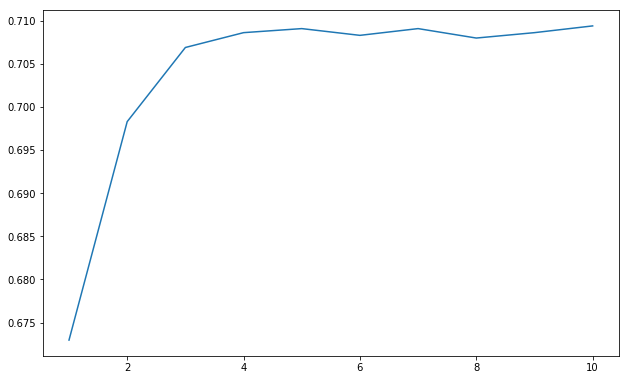

best params:  {'n_neighbors': 10}
best score:  0.7296875


In [34]:
knn_results = pd.DataFrame(grid_knn_cv.cv_results_)
# Ваш код здесь

#l1_res = results[results['param_penalty'] == 'l1']

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(knn_results['param_n_neighbors'], l1_res['mean_test_score'])

plt.show()

print('best params: ', grid_knn_cv.best_params_)
print('best score: ', grid_knn_cv.best_score_)

Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки (`.predict_proba`).

In [33]:
# Ваш код здесь
best_knn_clf = KNeighborsClassifier(n_neighbors=grid_knn_cv.best_params_['n_neighbors'], 
                                    weights = 'distance')

best_knn_clf.fit(train_feature_matrix, train_labels)

probabilities = best_knn_clf.predict_proba(test_feature_matrix)
probabilities.shape

(1600, 7)

#### 2.4 Сравнение результатов логистической регрессии и kNN (10%).

В реальной жизни новые данные становятся доступны с течением времени. Сравните качество Вашей лучшей модели логистической регресии и лучшего kNN  на отложенной выборке `delayed_data`. Какая из моделей показала лучший результат?

In [35]:
# Ваш код здесь
delayed_labels = delayed_data[delayed_data.columns[-1]].values
delayed_feature_matrix = delayed_data[delayed_data.columns[:-1]].values

#lr_proba = best_lr_clf.predict_proba(delayed_feature_matrix)
#knn_proba = best_knn_clf.predict_proba(delayed_feature_matrix)

predictions_lr = best_lr_clf.predict(delayed_feature_matrix)
print('lr_score: ', accuracy_score(delayed_labels, predictions_lr))

predictions_knn = best_knn_clf.predict(delayed_feature_matrix)
print('knn_score: ', accuracy_score(delayed_labels, predictions_knn))

lr_score:  0.698
knn_score:  0.736
